4. Prediction model
1. Iterate through different combinations of features to identify the optimal features and 
remove potential correlated features (if any) for your predictions (you can use the 
feature ranking results from section 3). Add the derived features from section 2 to your 
features used to build the model. The motive is to create a consolidated dataset for 
building a model. 
2. Start with a Bayes Classifier as discussed in Lecture 5 to get identify the customers 
who will be a repeat buyer or not.
a. Use 80% of data for training and 20% of data for testing. Compare the model 
accuracy for training and test data sets. (5 points)
b. Extend the use case of Bayer classier to design a recommendation system 
for the customers. 
3. Use a non-parametric technique, for example nearest neighbors and Parzen 
windows for classification (as discussed in Lecture 7).
a. For nearest neighbor demonstrate your understanding of how to choose 
the value of K and use various distance measure techniques. (try 3 
different distance measure).
b. Perform a comparative study of performance analysis for Parzen window 
and nearest neighbor. 
4. Implement a neural network model for classification and perform the model 
evaluation as mentioned in section 5.


Naive Bayes

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# Load the consolidated dataset
df = pd.read_csv('final_data.csv')

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Perform data preprocessing to handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluate model accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Model Accuracy (Training Set):", train_accuracy)
print("Model Accuracy (Testing Set):", test_accuracy)

# Use the trained model for recommendations
# Assuming X_test contains customer data for recommendations
recommendations = model.predict(X_test)

# Print the recommendations
print("Recommendations:")
print(recommendations)


Model Accuracy (Training Set): 0.9384543630764512
Model Accuracy (Testing Set): 0.9394418568991624
Recommendations:
[0 0 0 ... 0 0 0]


In [82]:
from sklearn.metrics import classification_report

report = classification_report(y_test, recommendations)
print(report)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     98027
           1       0.00      0.00      0.00      6319

    accuracy                           0.94    104346
   macro avg       0.47      0.50      0.48    104346
weighted avg       0.88      0.94      0.91    104346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


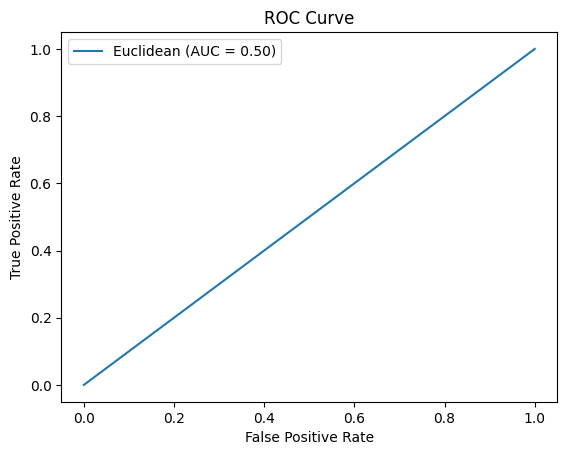

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_euclidean, tpr_euclidean, thresholds_euclidean = roc_curve(y_test, recommendations)

auc_euclidean = roc_auc_score(y_test, recommendations)

plt.plot(fpr_euclidean, tpr_euclidean, label='Euclidean (AUC = {:.2f})'.format(auc_euclidean))
# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Show the plot
plt.show()


KNN

In [67]:
pip install knn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

# Load the consolidated dataset
df = pd.read_csv('/content/drive/MyDrive/PR Project/train_format1.csv')

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Preprocess the data by replacing missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the accuracy of K-Nearest Neighbors Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K-Nearest Neighbors Classifier:", accuracy_knn)


Accuracy of K-Nearest Neighbors Classifier: 0.9378797462288924


In [78]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_knn)
print(report)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     49026
           1       0.09      0.00      0.01      3147

    accuracy                           0.94     52173
   macro avg       0.51      0.50      0.49     52173
weighted avg       0.89      0.94      0.91     52173



In [108]:
!pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


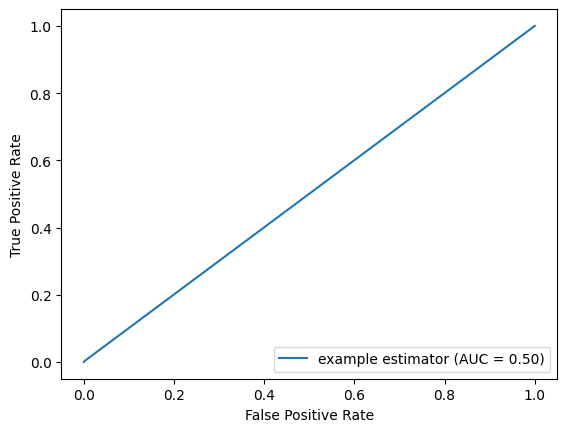

In [115]:
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

Parzen Window

In [74]:
from sklearn.neighbors import KernelDensity

parzen = KernelDensity()
parzen.fit(X_train, y_train)

KernelDensity()

In [75]:
accuracy_score(y_test, knn.predict(X_test))


0.9378797462288924

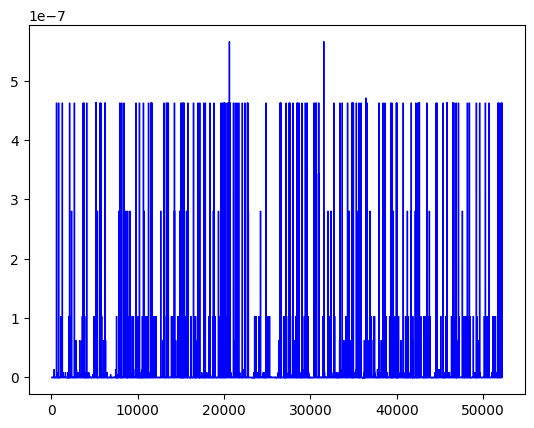

In [76]:
log_dens = parzen.score_samples(X_test)

plt.fill(np.exp(log_dens), c='blue')

In [86]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.94      0.94      0.94     49026
           1       0.06      0.06      0.06      3147

    accuracy                           0.89     52173
   macro avg       0.50      0.50      0.50     52173
weighted avg       0.89      0.89      0.89     52173



CNN

In [88]:
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import resample

input_shape = (X_train.shape[1],)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_split=0.2)


Epoch 1/12
5218/5218 [==============================] - 17s 3ms/step - loss: 117.0388 - accuracy: 0.9196 - val_loss: 0.2291 - val_accuracy: 0.9394
Epoch 2/12
5218/5218 [==============================] - 22s 4ms/step - loss: 0.3551 - accuracy: 0.9376 - val_loss: 0.2286 - val_accuracy: 0.9394
Epoch 3/12
5218/5218 [==============================] - 17s 3ms/step - loss: 0.2847 - accuracy: 0.9383 - val_loss: 0.2286 - val_accuracy: 0.9394
Epoch 4/12
5218/5218 [==============================] - 25s 5ms/step - loss: 0.2565 - accuracy: 0.9384 - val_loss: 0.2286 - val_accuracy: 0.9394
Epoch 5/12
5218/5218 [==============================] - 21s 4ms/step - loss: 0.2538 - accuracy: 0.9384 - val_loss: 0.2286 - val_accuracy: 0.9394
Epoch 6/12
5218/5218 [==============================] - 19s 4ms/step - loss: 0.2475 - accuracy: 0.9384 - val_loss: 0.2286 - val_accuracy: 0.9394
Epoch 7/12
5218/5218 [==============================] - 18s 3ms/step - loss: 0.2407 - accuracy: 0.9384 - val_loss: 0.2286 - val_

In [89]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1631/1631 - 2s - loss: 0.2279 - accuracy: 0.9397 - 2s/epoch - 1ms/step

Test accuracy: 0.9396814703941345


In [94]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

ValueError: ignored

RNN

In [98]:

#RNN model
model1 = keras.Sequential([
    keras.layers.LSTM(128, input_shape=(1, X_train.shape[2])),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model1.fit(X_train, y_train, epochs=14, batch_size=32, validation_split=0.2)

test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)




Epoch 1/14
5218/5218 [==============================] - 43s 7ms/step - loss: 0.2395 - accuracy: 0.9384 - val_loss: 0.2302 - val_accuracy: 0.9394
Epoch 2/14
5218/5218 [==============================] - 39s 8ms/step - loss: 0.2359 - accuracy: 0.9384 - val_loss: 0.2306 - val_accuracy: 0.9394
Epoch 3/14
5218/5218 [==============================] - 38s 7ms/step - loss: 0.2344 - accuracy: 0.9384 - val_loss: 0.2290 - val_accuracy: 0.9394
Epoch 4/14
5218/5218 [==============================] - 38s 7ms/step - loss: 0.2336 - accuracy: 0.9384 - val_loss: 0.2286 - val_accuracy: 0.9394
Epoch 5/14
5218/5218 [==============================] - 36s 7ms/step - loss: 0.2330 - accuracy: 0.9384 - val_loss: 0.2287 - val_accuracy: 0.9394
Epoch 6/14
5218/5218 [==============================] - 38s 7ms/step - loss: 0.2325 - accuracy: 0.9384 - val_loss: 0.2324 - val_accuracy: 0.9394
Epoch 7/14
5218/5218 [==============================] - 37s 7ms/step - loss: 0.2323 - accuracy: 0.9384 - val_loss: 0.2287 - val_ac

CNN vs RNN

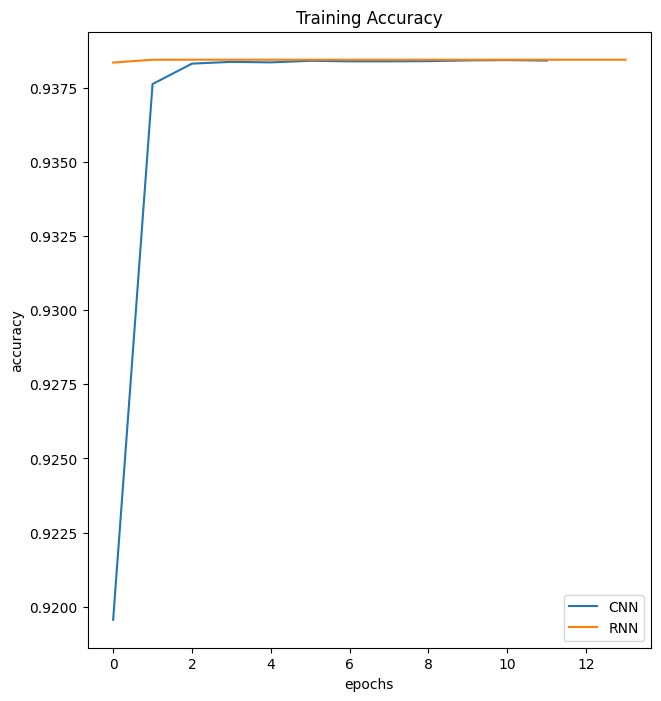

In [99]:
acc1 = history1.history['accuracy']
loss1 =history1.history['loss']

acc2 = history2.history['accuracy']
loss2 = history2.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc1, label='CNN')
plt.plot(acc2, label='RNN')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()